In [6]:
#Pull Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [7]:
#Read in csv file
data = pd.read_csv("archive/Spotify_data_csv.csv")
data

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,9/25/28,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,5/15/20,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,6/8/20,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,5/29/20,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2/28/20,0.0385,129.916,0.4720,2020


In [10]:
#Truncate to 75 years
data_75 = data.loc[(data["year"] >= 1945) & (data["year"] <= 2020)]
data_75

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
554,0.8140,['Chapuseaux y Damirón'],0.546,159608,0.3980,0,2hIJRV7y9lyjI1Y980NiR7,0.095900,0,0.3140,-17.060,1,Puchunguita,0,1/1/45,0.0671,157.927,0.9640,1945
555,0.9920,"['Robert Schumann', 'William Kapell']",0.286,208640,0.0231,0,2hOUyObeu7qFYfPKMHfNUa,0.919000,6,0.2130,-25.210,1,"3 Romanzen, Op. 28: 2. Einfach",0,1945,0.0329,75.078,0.0931,1945
556,0.9880,"['Modest Mussorgsky', 'William Kapell']",0.650,148707,0.1110,0,2hQ9VPaXuDga80eCNoV3Bg,0.780000,1,0.0886,-19.037,0,Pictures at an Exhibition: Bydlo,0,1945,0.0795,108.190,0.4900,1945
557,0.9630,['Sonny Boy Williamson I'],0.612,187324,0.2430,0,2hVdthNDvGTufvvPdMpiUQ,0.001040,7,0.1900,-14.848,1,Mattie Mae Blues,0,1945,0.1080,84.295,0.7440,1945
558,0.1420,['Эрих Мария Ремарк'],0.705,97400,0.1490,1,2hYekxMbTgBWJi6XEEexyO,0.000002,1,0.3100,-19.212,1,Часть 105.2 - Триумфальная арка,0,1945,0.9270,107.406,0.5570,1945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,5/15/20,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,6/8/20,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,5/29/20,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2/28/20,0.0385,129.916,0.4720,2020


The r-squared is: 0.07121105933421006


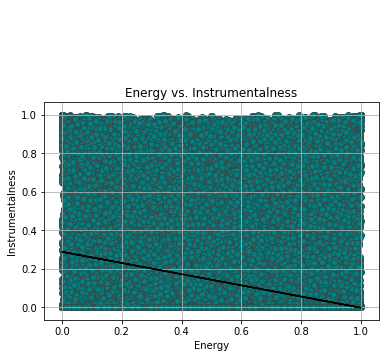

In [17]:
#Scatterplot of energy vs. instrumentalness
x_values = data_75["energy"]
y_values = data_75["instrumentalness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the scatter plot and linear regression
plt.scatter(x_values, y_values, facecolor="teal", edgecolor="darkslategrey")
plt.plot(x_values,regress_values,"r-", color="black")
plt.annotate(line_eq,(0.25, 1.5),fontsize=15,color="black")

#Add grid
plt.grid()

#Set titles, x and y labels
plt.title("Energy vs. Instrumentalness")
plt.xlabel("Energy")
plt.ylabel("Instrumentalness")

#Print the r-squared value
print(f"The r-squared is: {rvalue**2}")

#Save PNG of plot
plt.savefig("archive/energy_instrumentalness.png")

#Display scatter plot
plt.show()

The r-squared is: 0.6137334797967688


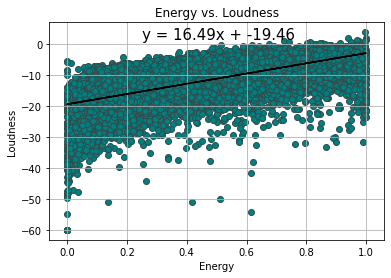

In [18]:
#Scatterplot of energy vs. loudness
x_values = data_75["energy"]
y_values = data_75["loudness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the scatter plot and linear regression
plt.scatter(x_values, y_values, facecolor="teal", edgecolor="darkslategrey")
plt.plot(x_values,regress_values,"r-", color="black")
plt.annotate(line_eq,(0.25, 1.5),fontsize=15,color="black")

#Add grid
plt.grid()

#Set titles, x and y labels
plt.title("Energy vs. Loudness")
plt.xlabel("Energy")
plt.ylabel("Loudness")

#Print the r-squared value
print(f"The r-squared is: {rvalue**2}")

#Save PNG of plot
plt.savefig("archive/energy_loudness.png")

#Display scatter plot
plt.show()

The r-squared is: 0.02035971517241127


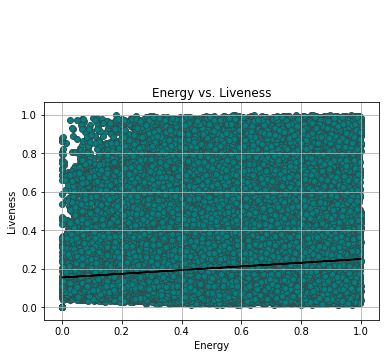

In [20]:
#Scatterplot of energy vs. liveness
x_values = data_75["energy"]
y_values = data_75["liveness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the scatter plot and linear regression
plt.scatter(x_values, y_values, facecolor="teal", edgecolor="darkslategrey")
plt.plot(x_values,regress_values,"r-", color="black")
plt.annotate(line_eq,(0.25, 1.5),fontsize=15,color="black")

#Add grid
plt.grid()

#Set titles, x and y labels
plt.title("Energy vs. Liveness")
plt.xlabel("Energy")
plt.ylabel("Liveness")

#Print the r-squared value
print(f"The r-squared is: {rvalue**2}")

#Save PNG of plot
plt.savefig("archive/energy_liveness.png")

#Display scatter plot
plt.show()

In [ ]:
#Scatterplot of energy vs. acoustica
x_values = data_75["energy"]
y_values = data_75["instrumentalness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the scatter plot and linear regression
plt.scatter(x_values, y_values, facecolor="teal", edgecolor="darkslategrey")
plt.plot(x_values,regress_values,"r-", color="black")
plt.annotate(line_eq,(0.25, 1.5),fontsize=15,color="black")

#Add grid
plt.grid()

#Set titles, x and y labels
plt.title("Energy vs. Instrumentalness")
plt.xlabel("Energy")
plt.ylabel("Instrumentalness")

#Print the r-squared value
print(f"The r-squared is: {rvalue**2}")

#Save PNG of plot
plt.savefig("archive/energy_instrumentalness.png")

#Display scatter plot
plt.show()